In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [1]:
# Re-importing necessary libraries and reloading the data due to code execution state reset
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import requests
from io import StringIO
import json
import random
import numpy as np
import itertools
import math
import torch
import os
from tqdm import tqdm
import seaborn as sns
from typing import List
import matplotlib.pyplot as plt

In [2]:

#-------------------------------------------------------------
seed = 100
# Set the random seed for Python's random module
random.seed(seed)
# Set the random seed for NumPy
np.random.seed(seed)
print('seed :',seed)
#-------------------------------------------------------------

df = pd.read_pickle('earthquake_data.pkl')
start_time = "1986-01-01"
end_time = "2024-05-01"
# df = df[df['time'] >= start_time]
df = df[df['mag'] >= 4]
min_magnitude = 0.0
# Define the geographical bounds
min_lat, max_lat, min_lon, max_lon = 32, 36, -120, -114
df = df[df['longitude'] >= min_lon]
df = df[df['longitude'] <= max_lon]
df = df[df['latitude'] >= min_lat]
df = df[df['latitude'] <= max_lat]
df.reset_index(drop=True, inplace=True)


# Define the ranges and step
step = 0.1

# Create bins
num_steps_lat = int((max_lat - min_lat) / step)
lat_bins = pd.IntervalIndex.from_breaks(np.linspace(min_lat, max_lat, num_steps_lat + 1))
num_steps_lon = int((max_lon - min_lon) / step)
lon_bins = pd.IntervalIndex.from_breaks(np.linspace(min_lon, max_lon, num_steps_lon + 1))

# Generate all combinations of bins
combinations = list(itertools.product(lat_bins, lon_bins))

# Assign a unique number to each combination
combination_mapping = {combo: i+1 for i, combo in enumerate(combinations)}

# Assign each data point to a bin
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, include_lowest=True)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, include_lowest=True)

# Remove rows with NaN values in 'lat_bin' or 'lon_bin'
df = df.dropna(subset=['lat_bin', 'lon_bin'])

# Map each row in the DataFrame to its unique number, handling missing keys
df['square'] = df.apply(lambda row: combination_mapping.get((row['lat_bin'], row['lon_bin']), -1), axis=1)

# List of unique squares that contain data
unique_values = df['square'].unique()
list_of_squares = np.sort(unique_values)

# Convert to pandas Timestamps
timestamps = pd.to_datetime(df['time'], utc=True)
# Convert to naive timestamps (remove timezone)
# Convert to a Series
timestamp_series = pd.Series(timestamps)
# Convert to naive timestamps (remove timezone) using dt accessor
naive_timestamp_series = timestamp_series.dt.tz_convert(None)
# Format the timestamps to remove fractional seconds
formatted_timestamps = naive_timestamp_series.dt.strftime('%Y-%m-%d %H:%M:%S')
# Convert the index to datetime
df.index = pd.to_datetime(formatted_timestamps)


print(df)

pd.to_pickle(df, open('earthquake_large_data.pkl', 'wb'))


seed : 100
                                   time   latitude   longitude  depth   mag  \
time                                                                          
1950-02-26 00:06:22 1950-02-26 00:06:22  34.775667 -119.088833   6.00  4.49   
1950-04-15 11:56:33 1950-04-15 11:56:33  35.877333 -119.692167   6.00  4.40   
1950-07-27 09:54:18 1950-07-27 09:54:18  32.899833 -115.241333   6.00  4.27   
1950-07-27 11:29:24 1950-07-27 11:29:24  33.021667 -115.512833   6.00  4.76   
1950-07-27 12:02:11 1950-07-27 12:02:11  33.000000 -115.500000   6.00  4.19   
...                                 ...        ...         ...    ...   ...   
2024-02-12 08:36:25 2024-02-12 08:36:25  32.813500 -115.573500  17.93  4.81   
2024-02-12 08:38:34 2024-02-12 08:38:34  32.816167 -115.586667  13.64  4.05   
2024-02-12 08:42:48 2024-02-12 08:42:48  32.799833 -115.565500  15.76  4.56   
2024-02-14 07:53:13 2024-02-14 07:53:13  33.127667 -115.623000   9.84  4.04   
2024-04-18 19:19:18 2024-04-18 19:19:18  

In [ ]:
print(df[df['square']== 1100])

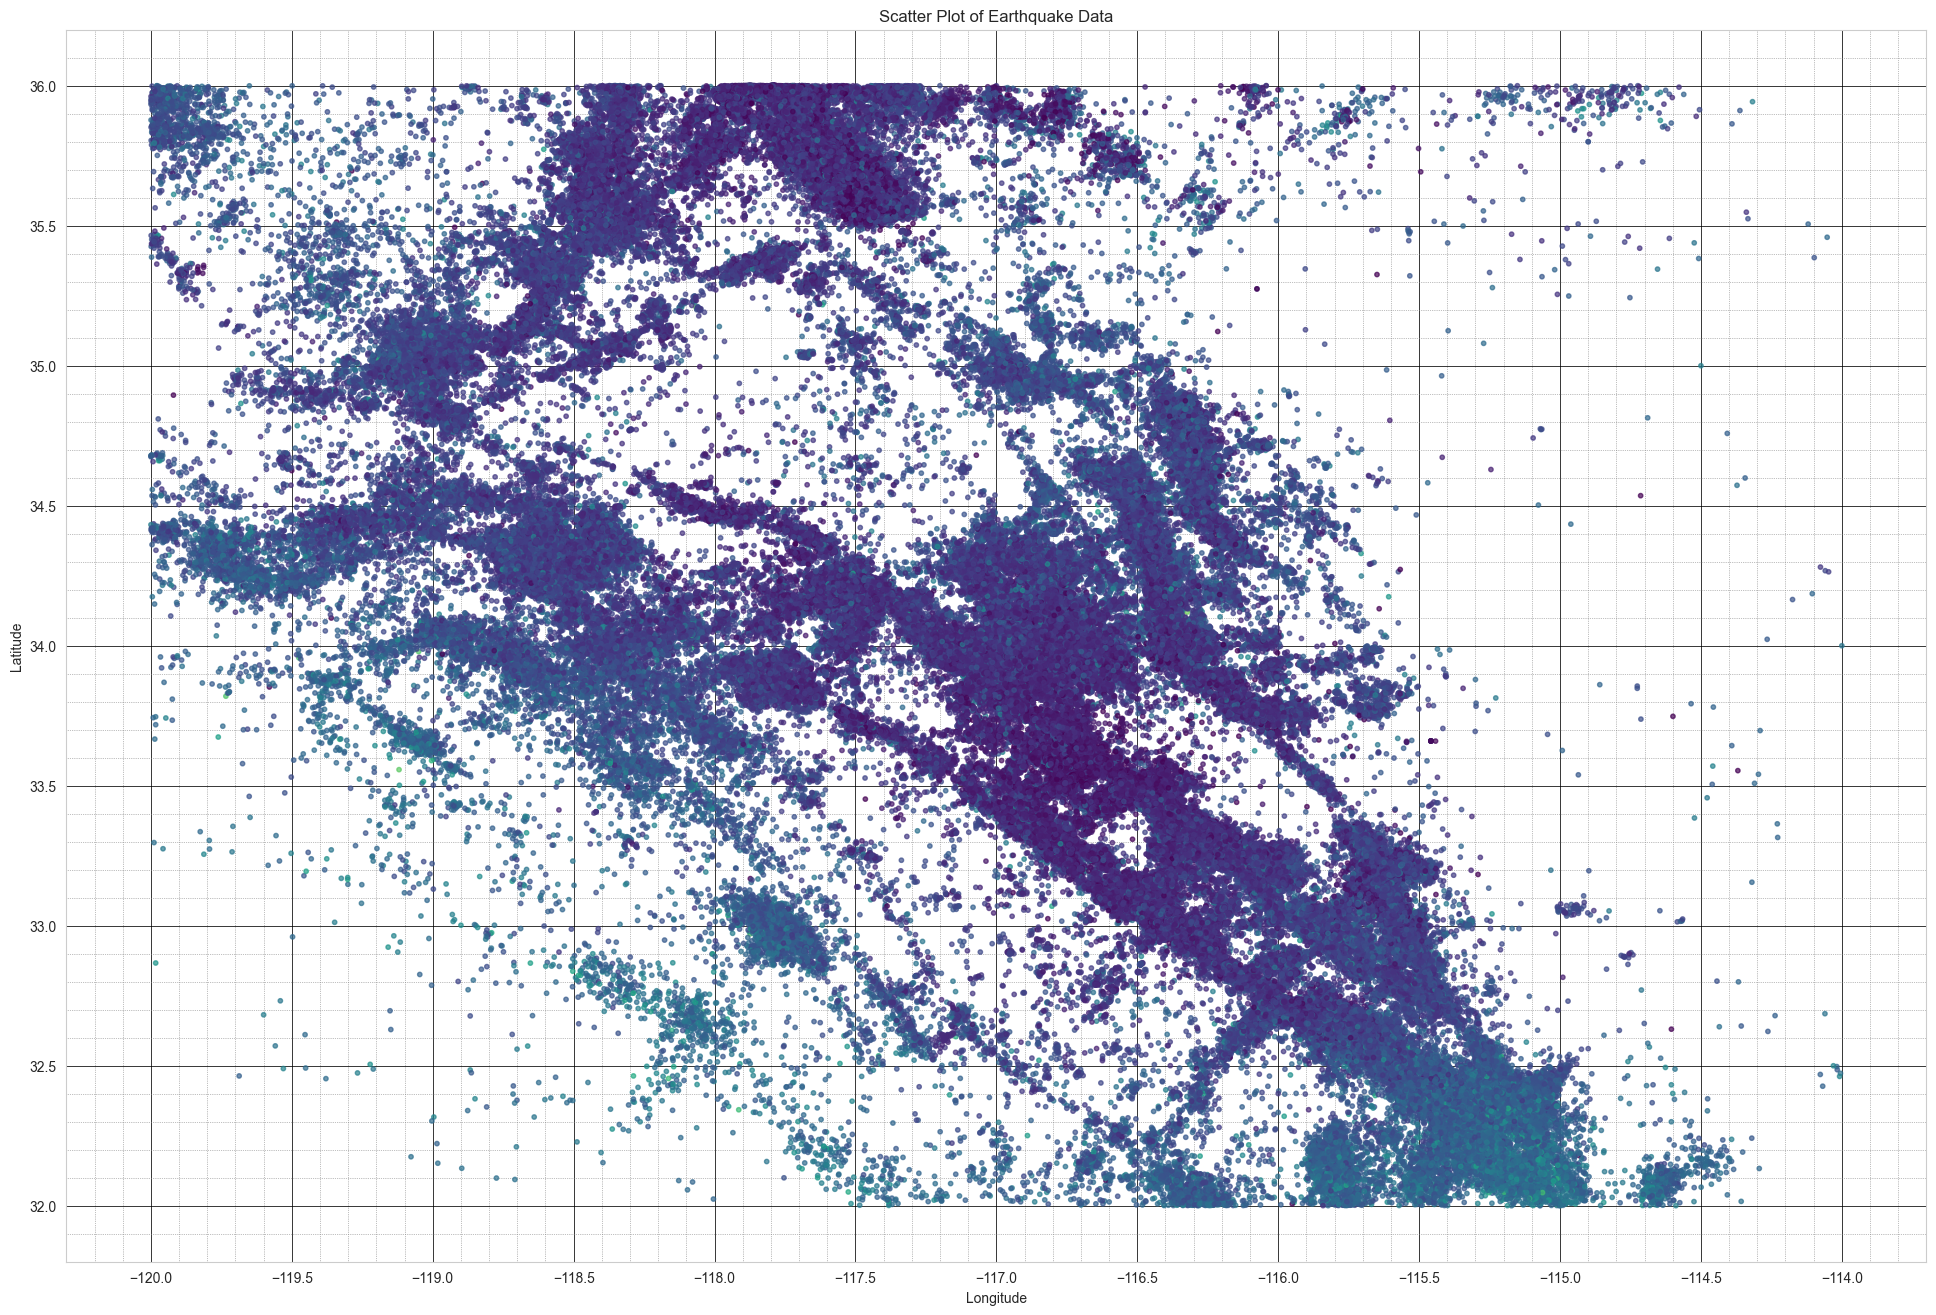

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='viridis', s=10, alpha=0.7)

# Adding color bar to indicate magnitude
colorbar = plt.colorbar(scatter)
colorbar.set_label('Magnitude')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Earthquake Data')

# Set the major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Enable the grid with minor ticks
plt.grid(which='both')

# Set the grid to be more visible for minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

# Set the grid to be more visible for major ticks
plt.grid(which='major', color='black', linestyle='-', linewidth=0.55)

plt.show()


C:\Users\alire\AppData\Local\Temp\ipykernel_5852\3773102095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_bins['lat_min'] = df_unique_bins['lat_bin'].apply(lambda x: x.left)
C:\Users\alire\AppData\Local\Temp\ipykernel_5852\3773102095.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_bins['lat_max'] = df_unique_bins['lat_bin'].apply(lambda x: x.right)
C:\Users\alire\AppData\Local\Temp\ipykernel_5852\3773102095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

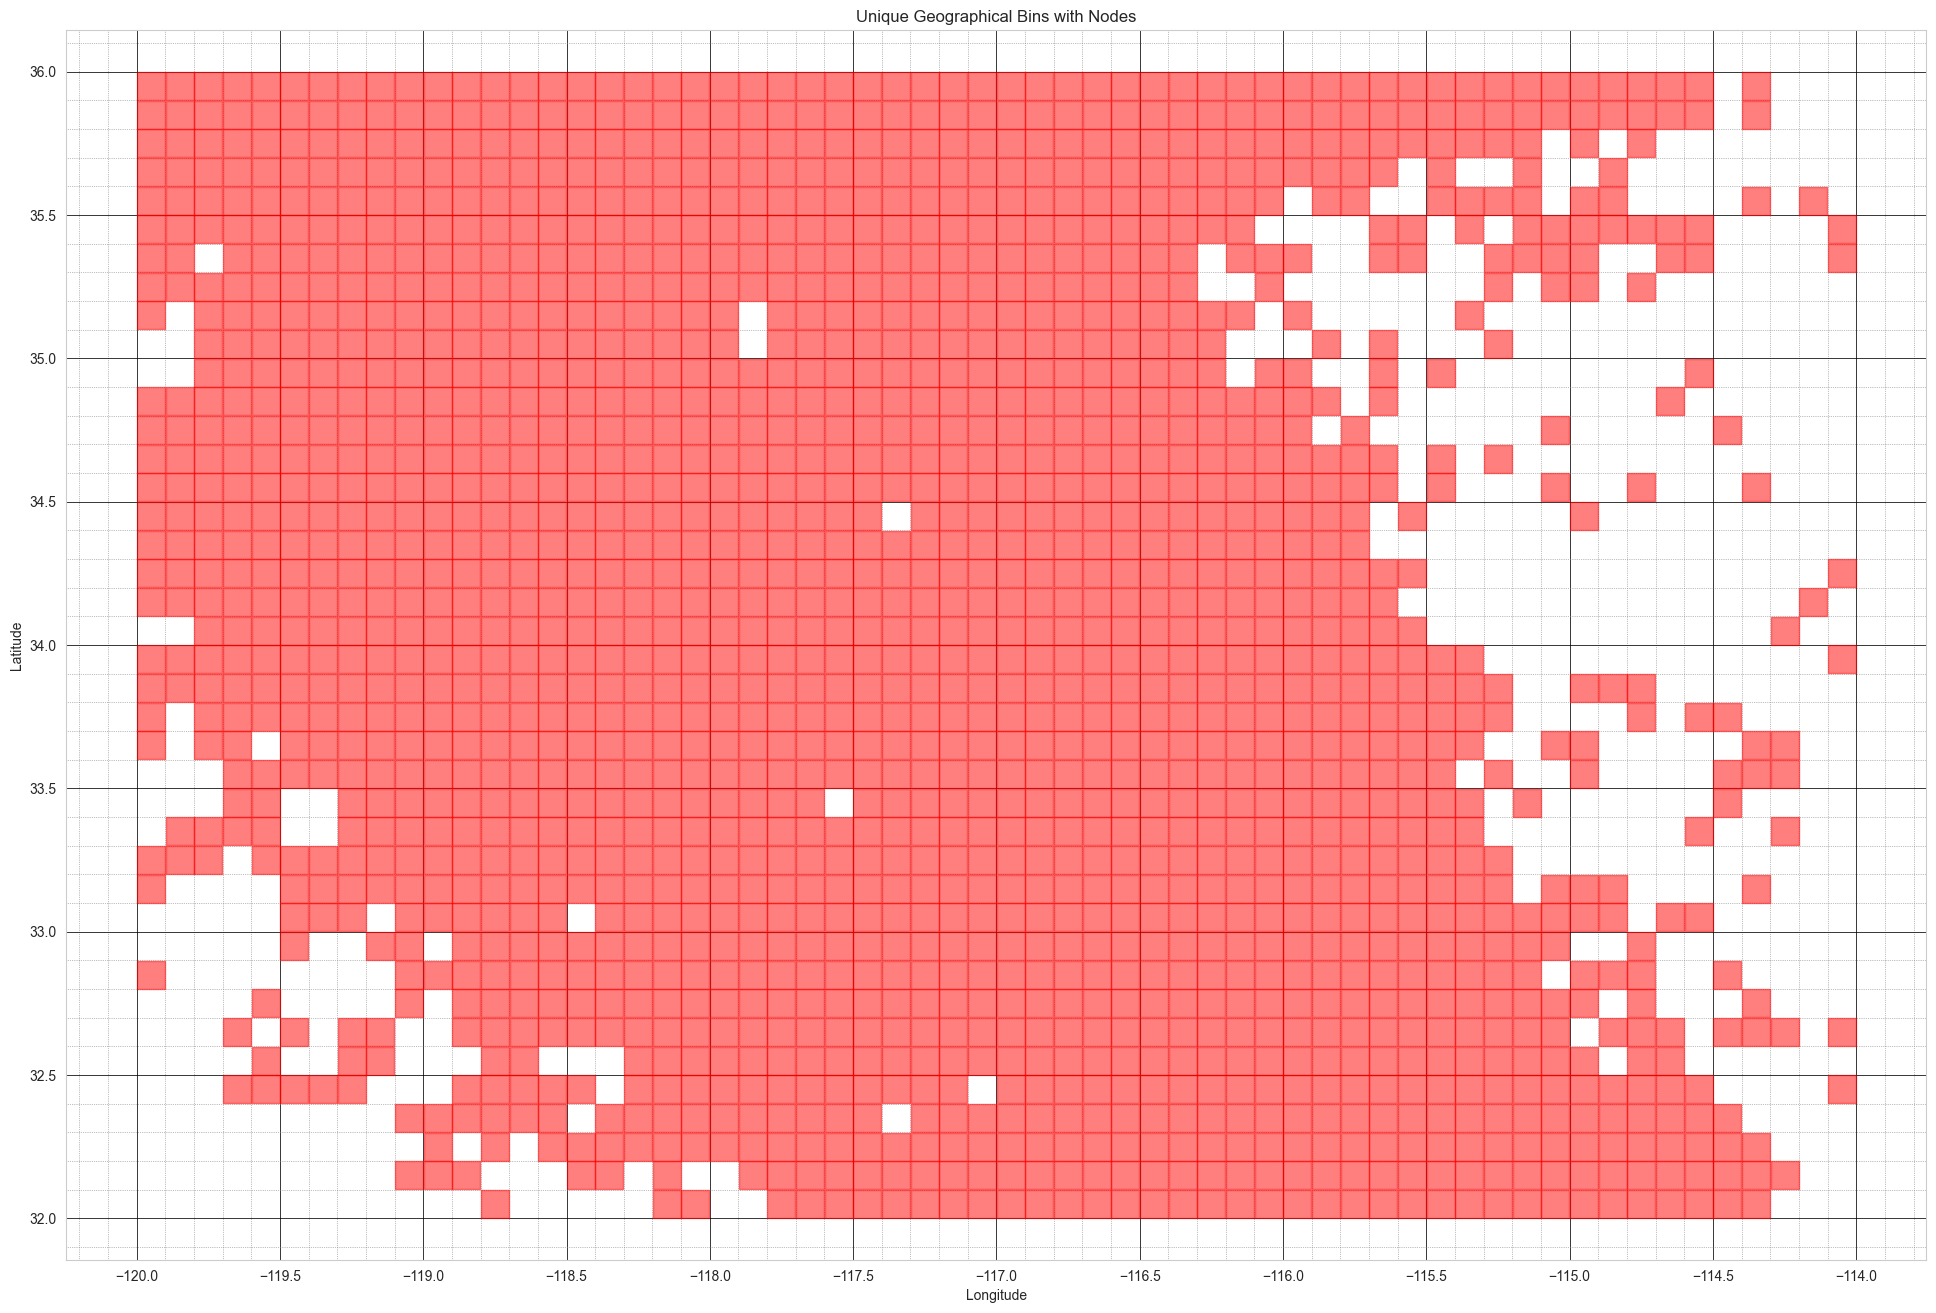

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

# Remove duplicate bins based on the 'square' column
df_unique_bins = df.drop_duplicates(subset='square')

# Convert 'lat_bin' and 'lon_bin' from intervals to their bounds
df_unique_bins['lat_min'] = df_unique_bins['lat_bin'].apply(lambda x: x.left)
df_unique_bins['lat_max'] = df_unique_bins['lat_bin'].apply(lambda x: x.right)
df_unique_bins['lon_min'] = df_unique_bins['lon_bin'].apply(lambda x: x.left)
df_unique_bins['lon_max'] = df_unique_bins['lon_bin'].apply(lambda x: x.right)

# Calculating the center of the bins
df_unique_bins['lat_center'] = (df_unique_bins['lat_min'].astype(float) + df_unique_bins['lat_max'].astype(float)) / 2
df_unique_bins['lon_center'] = (df_unique_bins['lon_min'].astype(float) + df_unique_bins['lon_max'].astype(float)) / 2

# Creating a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_unique_bins['lon_center'], df_unique_bins['lat_center'])]
gdf = gpd.GeoDataFrame(df_unique_bins, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(24, 16))
gdf.plot(ax=ax, marker='s', color='red', markersize=380, alpha=0.5)

# Adding titles and labels
plt.title('Unique Geographical Bins with Nodes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Annotating with square numbers
# for x, y, label in zip(df_unique_bins['lon_center'], df_unique_bins['lat_center'], df_unique_bins['square']):
#     plt.text(x, y, str(label), fontsize=12, ha='right')

# Set the major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Enable the grid with minor ticks
plt.grid(which='both')

# Set the grid to be more visible for minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

# Set the grid to be more visible for major ticks
plt.grid(which='major', color='black', linestyle='-', linewidth=0.55)

plt.show()


In [36]:
# Load data
path_to_filtered_data = './energy_fortnightly_0.1_14_featured_500.pkl'
print('reading data...')
data = pd.read_pickle(path_to_filtered_data)
data.drop(['start_date', 'end_day', 'energies_28', 'energies_84', 'energies_364', 'energies_1820'], axis=1, inplace=True)
data.drop(['counts_14', 'counts_28', 'counts_84', 'counts_364', 'counts_1820'], axis=1, inplace=True)
data.drop(['maxs_14', 'maxs_28', 'maxs_84', 'maxs_364', 'maxs_1820'], axis=1, inplace=True)

unique_squares_df = data.drop_duplicates(subset='unique_id')
unique_squares_df['id'] = unique_squares_df['unique_id'].str.replace('B', '')
print(unique_squares_df)


unique_bins = df_unique_bins[['lat_bin', 'lon_bin', 'lon_min',  'lon_max',  'lat_center', 'lon_center', 'square']]
unique_bins.set_index('square', inplace=True, drop=True)
print(unique_bins)


reading data...
        unique_id         ds    y    id
31024         B36 1950-01-17  0.0    36
32963         B37 1950-01-17  0.0    37
34902         B38 1950-01-17  0.0    38
36841         B39 1950-01-17  0.0    39
42658         B42 1950-01-17  0.0    42
...           ...        ...  ...   ...
3505712     B2364 1950-01-17  0.0  2364
3507651     B2365 1950-01-17  0.0  2365
3509590     B2366 1950-01-17  0.0  2366
3511529     B2367 1950-01-17  0.0  2367
3513468     B2368 1950-01-17  0.0  2368

[500 rows x 4 columns]
             lat_bin           lon_bin lon_min lon_max  lat_center  lon_center
square                                                                        
1182    (33.9, 34.0]  (-115.9, -115.8]  -115.9  -115.8       33.95     -115.85
1106    (33.8, 33.9]  (-117.5, -117.4]  -117.5  -117.4       33.85     -117.45
1223    (34.0, 34.1]  (-117.8, -117.7]  -117.8  -117.7       34.05     -117.75
1236    (34.0, 34.1]  (-116.5, -116.4]  -116.5  -116.4       34.05     -116.45
1412  

C:\Users\alire\AppData\Local\Temp\ipykernel_5852\2832692607.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_squares_df['id'] = unique_squares_df['unique_id'].str.replace('B', '')


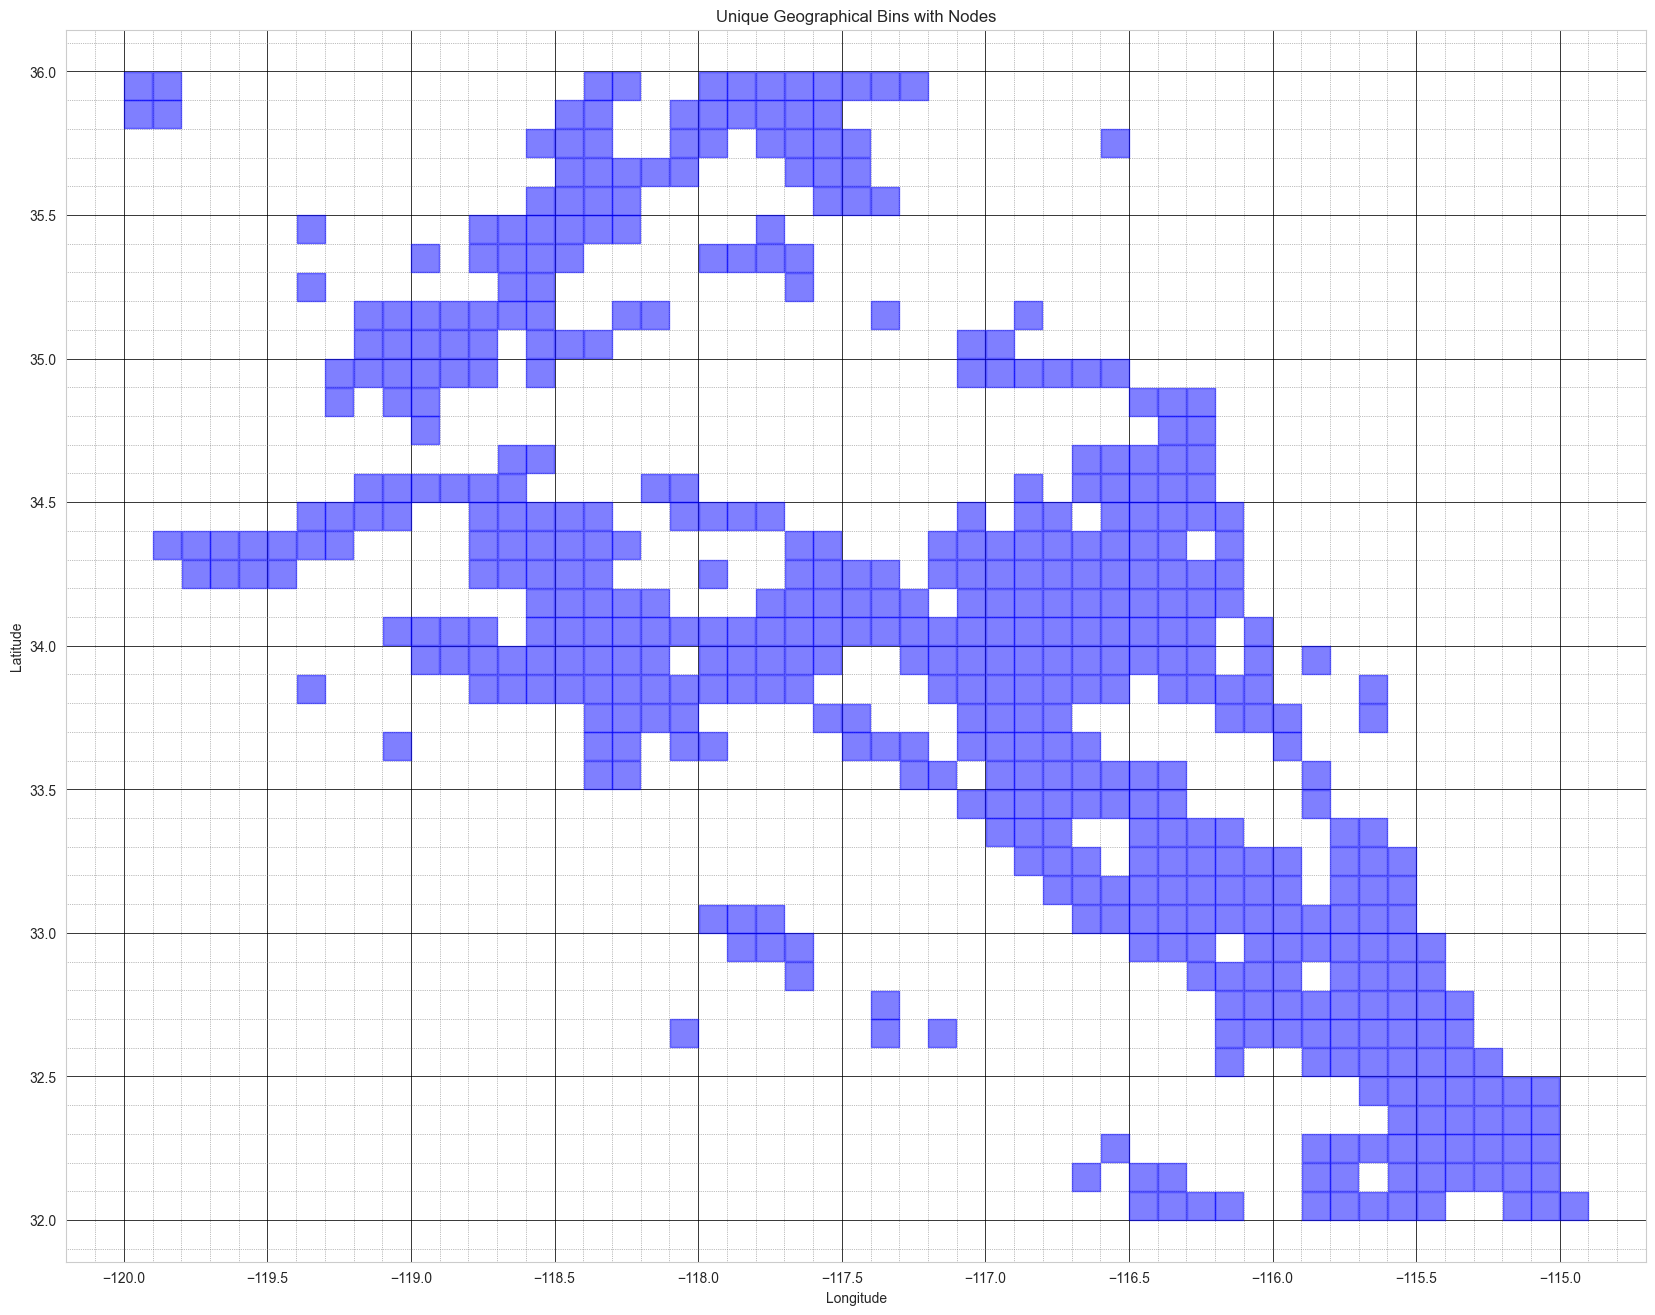

In [38]:
# Creating a GeoDataFrame
geometry_500 = []
for i in unique_squares_df['id']:
    lon = unique_bins.loc[int(i), 'lon_center']
    lat = unique_bins.loc[int(i), 'lat_center']
    geometry_500.append(Point(lon, lat))
    
gdf_500 = gpd.GeoDataFrame(unique_squares_df, geometry=geometry_500)

# Plotting
fig, ax = plt.subplots(figsize=(24, 16))
gdf_500.plot(ax=ax, marker='s', color='blue', markersize=380, alpha=0.5)

# Adding titles and labels
plt.title('Unique Geographical Bins with Nodes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Set the major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Enable the grid with minor ticks
plt.grid(which='both')

# Set the grid to be more visible for minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

# Set the grid to be more visible for major ticks
plt.grid(which='major', color='black', linestyle='-', linewidth=0.55)

plt.show()


C:\Users\alire\AppData\Local\Temp\ipykernel_5852\2189471178.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_bins['lat_min'] = df_unique_bins['lat_bin'].apply(lambda x: x.left)
C:\Users\alire\AppData\Local\Temp\ipykernel_5852\2189471178.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_bins['lat_max'] = df_unique_bins['lat_bin'].apply(lambda x: x.right)
C:\Users\alire\AppData\Local\Temp\ipykernel_5852\2189471178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

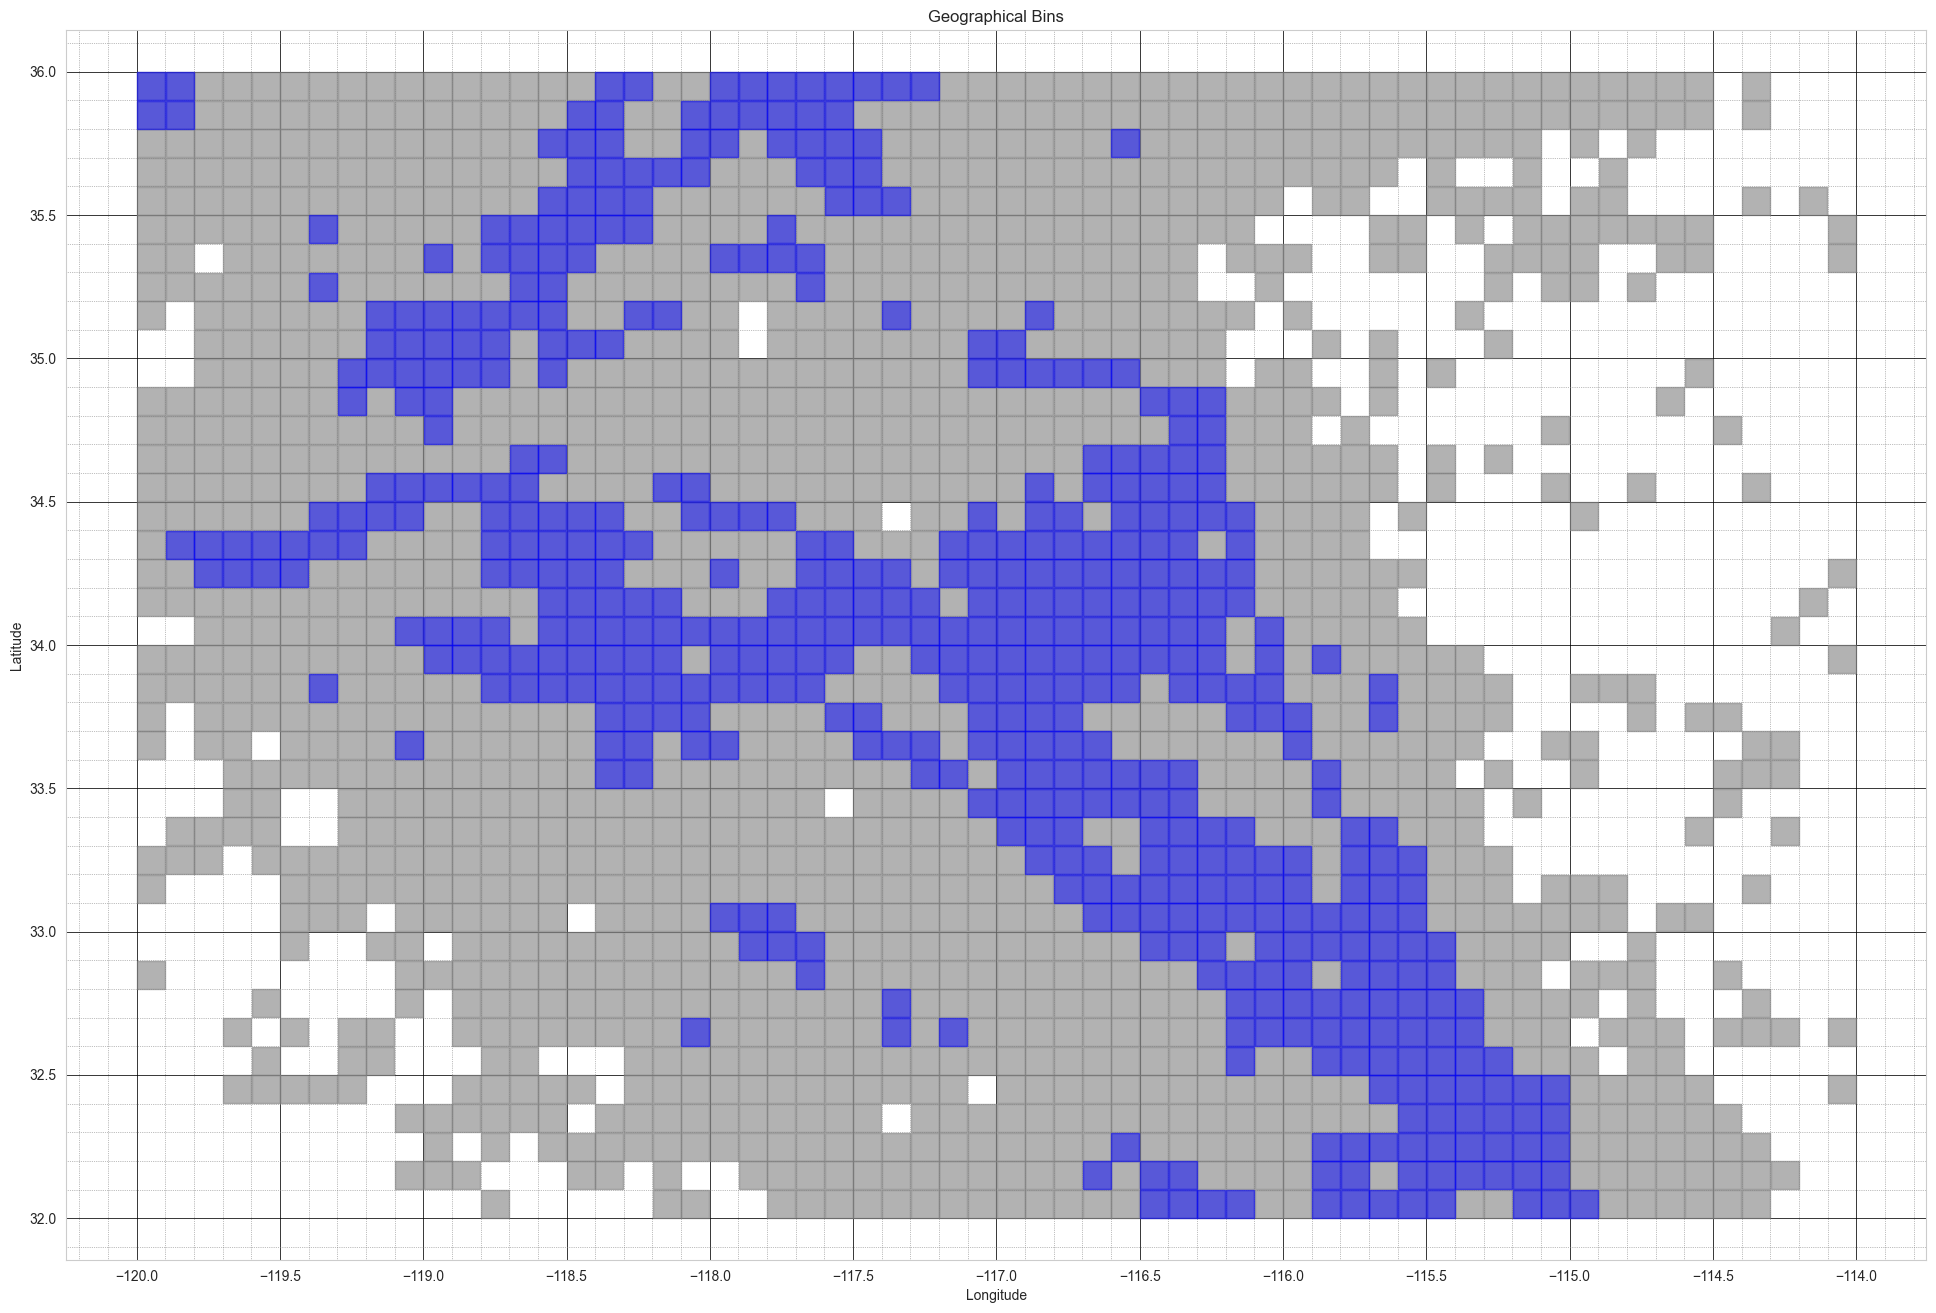

In [40]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

# Remove duplicate bins based on the 'square' column
df_unique_bins = df.drop_duplicates(subset='square')

# Convert 'lat_bin' and 'lon_bin' from intervals to their bounds
df_unique_bins['lat_min'] = df_unique_bins['lat_bin'].apply(lambda x: x.left)
df_unique_bins['lat_max'] = df_unique_bins['lat_bin'].apply(lambda x: x.right)
df_unique_bins['lon_min'] = df_unique_bins['lon_bin'].apply(lambda x: x.left)
df_unique_bins['lon_max'] = df_unique_bins['lon_bin'].apply(lambda x: x.right)

# Calculating the center of the bins
df_unique_bins['lat_center'] = (df_unique_bins['lat_min'].astype(float) + df_unique_bins['lat_max'].astype(float)) / 2
df_unique_bins['lon_center'] = (df_unique_bins['lon_min'].astype(float) + df_unique_bins['lon_max'].astype(float)) / 2

# Creating a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_unique_bins['lon_center'], df_unique_bins['lat_center'])]
gdf = gpd.GeoDataFrame(df_unique_bins, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(24, 16))
gdf.plot(ax=ax, marker='s', color='gray', markersize=380, alpha=0.6)

gdf_500.plot(ax=ax, marker='s', color='blue', markersize=380, alpha=0.5)


# Adding titles and labels
plt.title('Geographical Bins')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Set the major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Enable the grid with minor ticks
plt.grid(which='both')

# Set the grid to be more visible for minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

# Set the grid to be more visible for major ticks
plt.grid(which='major', color='black', linestyle='-', linewidth=0.55)

plt.show()



In [14]:
print(gdf_500)

        unique_id         ds    y    id                     geometry
31024         B36 1950-01-17  0.0    36  POINT (-116.45000 32.05000)
32963         B37 1950-01-17  0.0    37  POINT (-116.35000 32.05000)
34902         B38 1950-01-17  0.0    38  POINT (-116.25000 32.05000)
36841         B39 1950-01-17  0.0    39  POINT (-116.15000 32.05000)
42658         B42 1950-01-17  0.0    42  POINT (-115.85000 32.05000)
...           ...        ...  ...   ...                          ...
3505712     B2364 1950-01-17  0.0  2364  POINT (-117.65000 35.95000)
3507651     B2365 1950-01-17  0.0  2365  POINT (-117.55000 35.95000)
3509590     B2366 1950-01-17  0.0  2366  POINT (-117.45000 35.95000)
3511529     B2367 1950-01-17  0.0  2367  POINT (-117.35000 35.95000)
3513468     B2368 1950-01-17  0.0  2368  POINT (-117.25000 35.95000)

[500 rows x 5 columns]


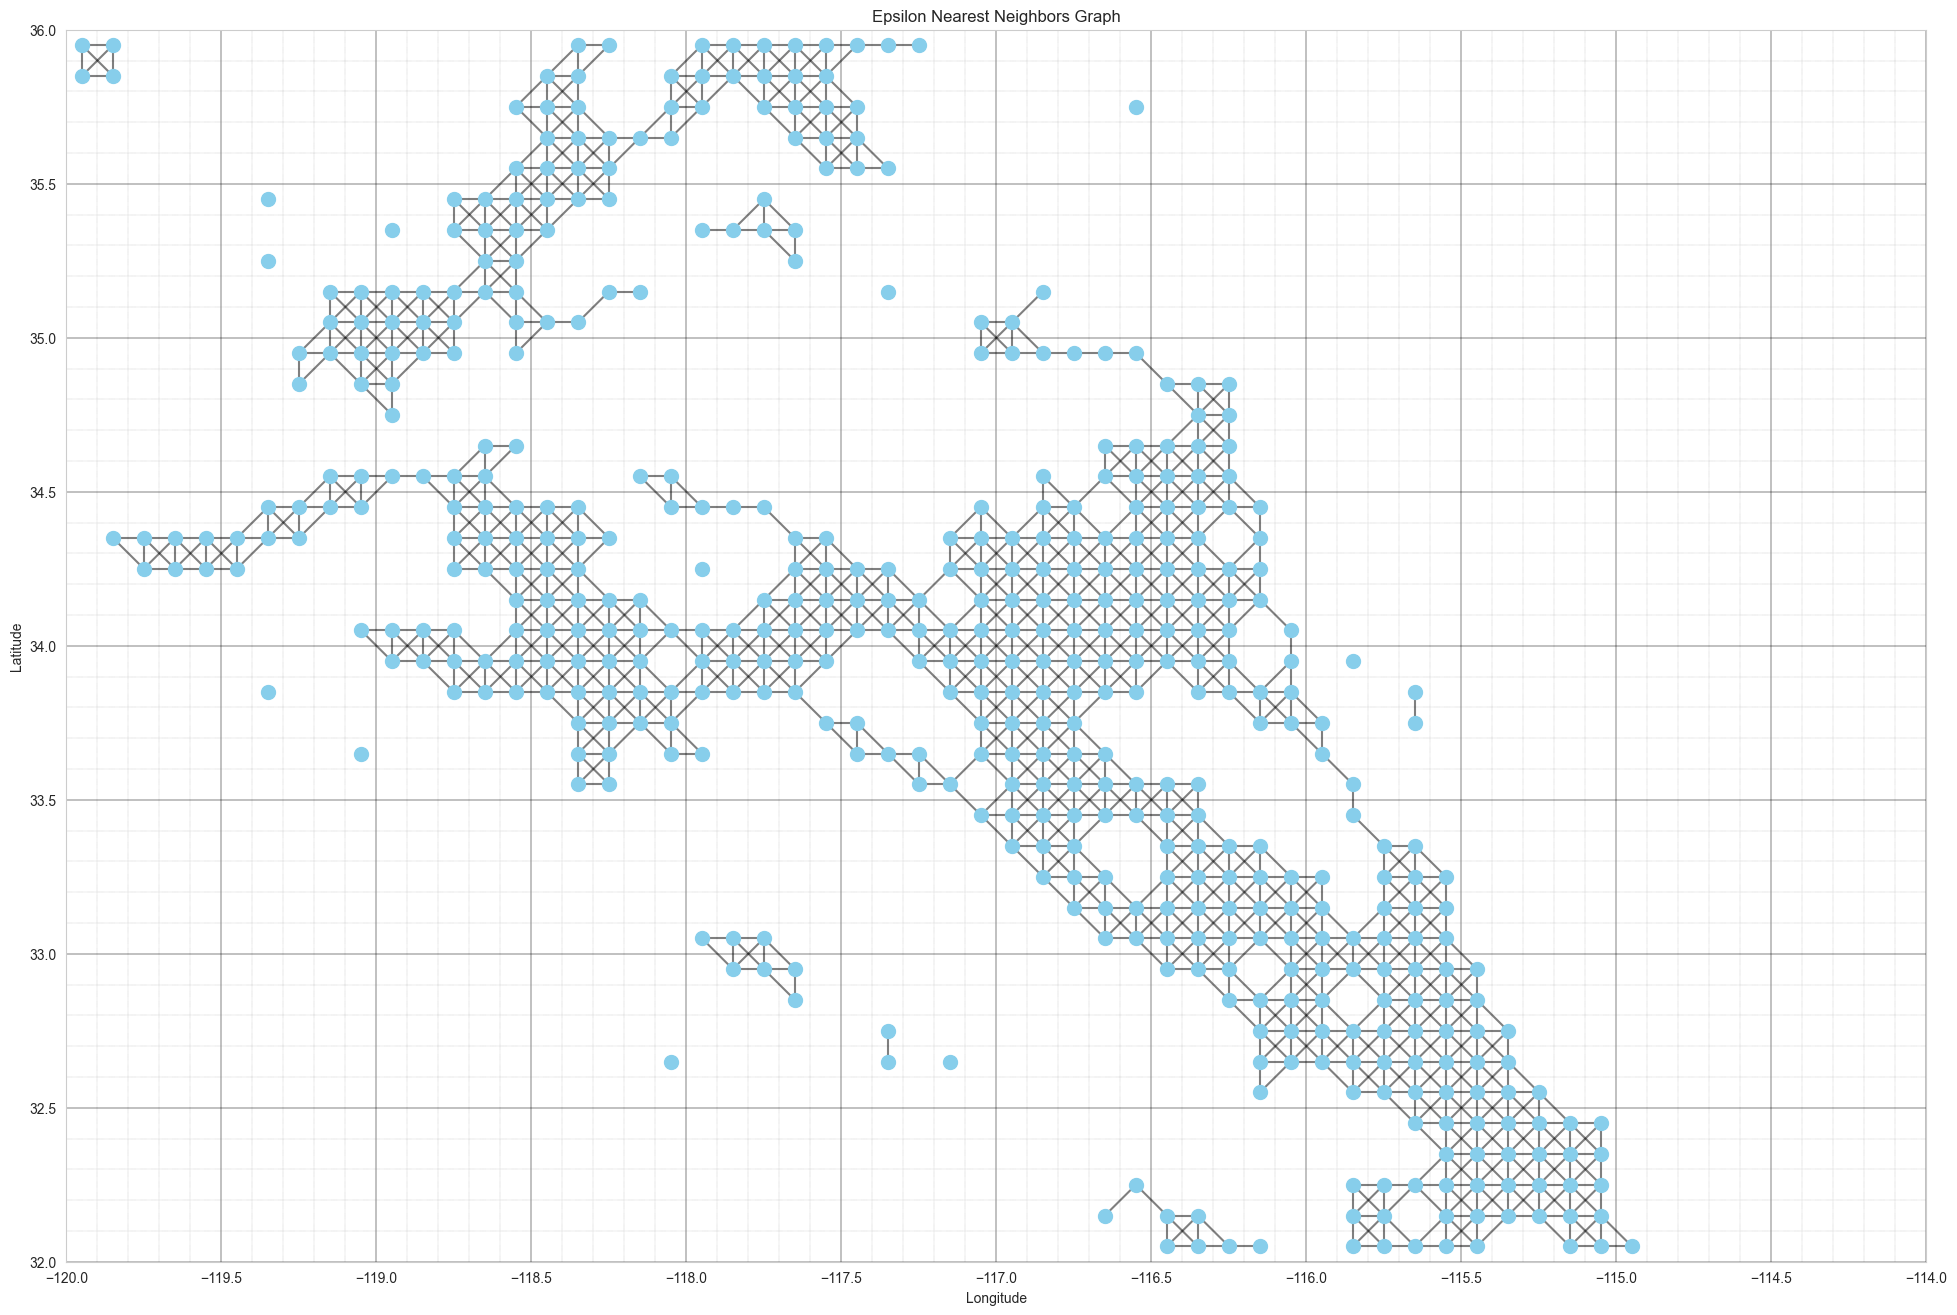

In [61]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming df is your DataFrame
df_gdf_500 = gdf_500

# Convert the 'geometry' column to geometric points if they are in string format
if isinstance(df_gdf_500['geometry'].iloc[0], str):
    df_gdf_500['geometry'] = df_gdf_500['geometry'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df_gdf_500, geometry='geometry')

# Extract coordinates
coordinates = np.array([(point.x, point.y) for point in gdf.geometry])

# Define epsilon (distance threshold)
epsilon = 0.15  # Adjust this value based on your requirements

# Create Nearest Neighbors model
nn = NearestNeighbors(radius=epsilon)
nn.fit(coordinates)

# Find pairs within the epsilon distance
distances, indices = nn.radius_neighbors(coordinates)

# Create the graph
G = nx.Graph()

# Add nodes
for idx, row in gdf.iterrows():
    G.add_node(row['unique_id'], pos=(row.geometry.x, row.geometry.y))

# Add edges
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if neighbor != i:  # avoid self-loops
            G.add_edge(gdf.iloc[i]['unique_id'], gdf.iloc[neighbor]['unique_id'])

# Extract positions for plotting
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph manually
plt.figure(figsize=(24, 16))
ax = plt.gca()

# Plot edges
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    ax.plot([x0, x1], [y0, y1], 'k-', alpha=0.5)

# Plot nodes
for node in G.nodes():
    x, y = pos[node]
    ax.plot(x, y, 'o', markersize=10, color='skyblue')

# Annotate nodes with labels
# for node, (x, y) in pos.items():
#     ax.text(x, y, str(node), fontsize=4, ha='center', color='black')

# Set axis limits and labels
min_lat, max_lat, min_lon, max_lon = 32, 36, -120, -114
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



plt.title('Epsilon Nearest Neighbors Graph')
# Set the major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Enable the grid with minor ticks
plt.grid(which='both')

# Set the grid to be more visible for minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.3)

# Set the grid to be more visible for major ticks
plt.grid(which='major', color='black', linestyle='-', linewidth=0.35)

plt.show()


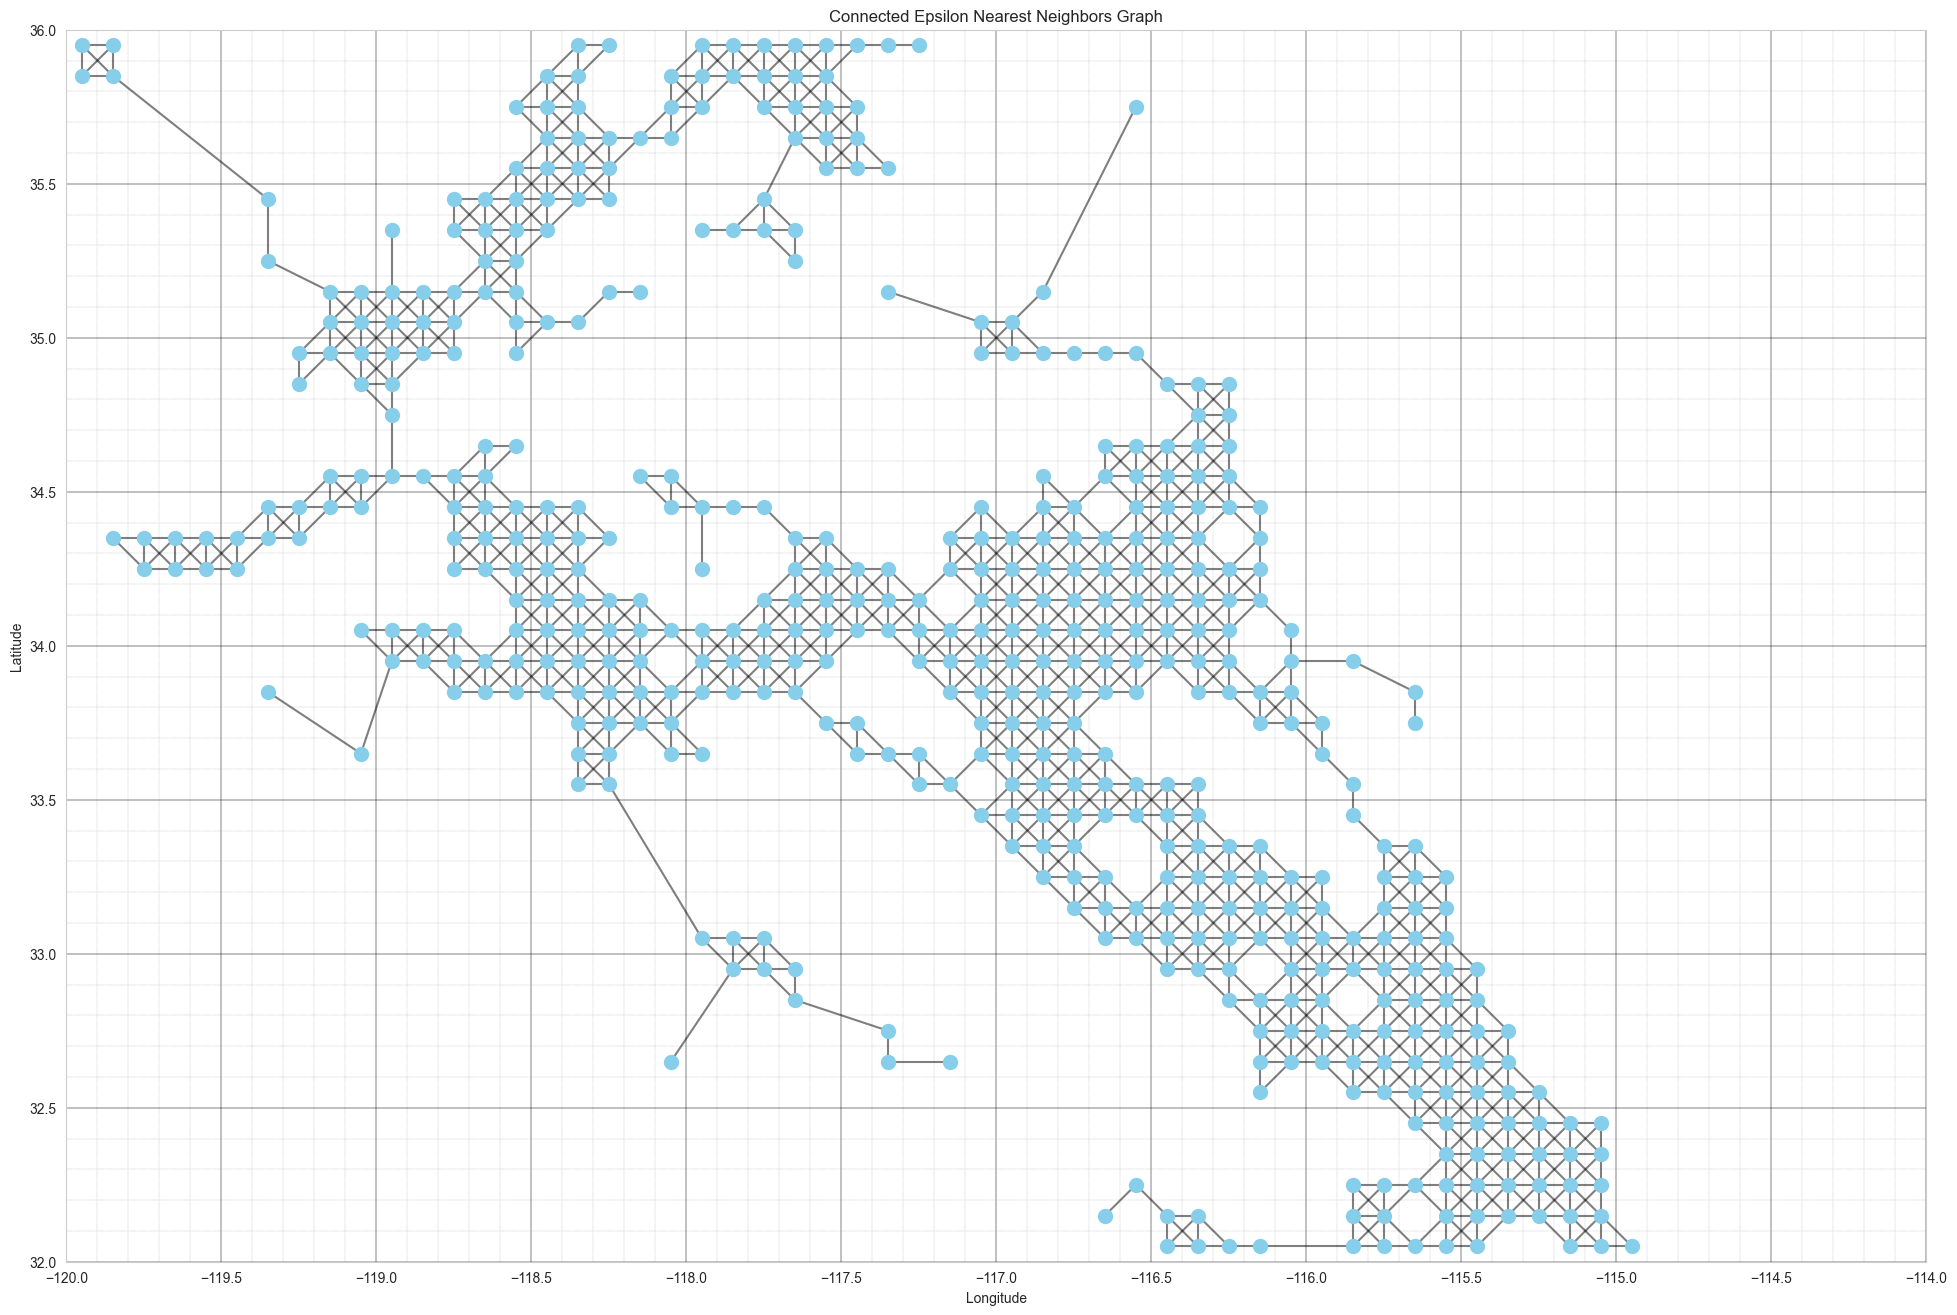

In [60]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

# Assuming df is your DataFrame
df_gdf_500 = gdf_500

# Convert the 'geometry' column to geometric points if they are in string format
if isinstance(df_gdf_500['geometry'].iloc[0], str):
    df_gdf_500['geometry'] = df_gdf_500['geometry'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df_gdf_500, geometry='geometry')

# Extract coordinates
coordinates = np.array([(point.x, point.y) for point in gdf.geometry])

# Define epsilon (distance threshold)
epsilon = 0.15  # Adjust this value based on your requirements

# Create Nearest Neighbors model
nn = NearestNeighbors(radius=epsilon)
nn.fit(coordinates)

# Find pairs within the epsilon distance
distances, indices = nn.radius_neighbors(coordinates)

# Create the graph
G = nx.Graph()

# Add nodes
for idx, row in gdf.iterrows():
    G.add_node(row['unique_id'], pos=(row.geometry.x, row.geometry.y))

# Add edges
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if neighbor != i:  # avoid self-loops
            G.add_edge(gdf.iloc[i]['unique_id'], gdf.iloc[neighbor]['unique_id'])

# Ensure the graph is connected by connecting components
if not nx.is_connected(G):
    components = list(nx.connected_components(G))
    while len(components) > 1:
        min_dist = float('inf')
        min_pair = None

        for i in range(len(components)):
            for j in range(i + 1, len(components)):
                comp1 = components[i]
                comp2 = components[j]
                for node1 in comp1:
                    for node2 in comp2:
                        coord1 = np.array(G.nodes[node1]['pos'])
                        coord2 = np.array(G.nodes[node2]['pos'])
                        dist = np.linalg.norm(coord1 - coord2)
                        if dist < min_dist:
                            min_dist = dist
                            min_pair = (node1, node2)
        
        G.add_edge(min_pair[0], min_pair[1])
        components = list(nx.connected_components(G))

# Plot the graph manually
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(24, 16))
ax = plt.gca()

# Plot edges
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    ax.plot([x0, x1], [y0, y1], 'k-', alpha=0.5)

# Plot nodes
for node in G.nodes():
    x, y = pos[node]
    ax.plot(x, y, 'o', markersize=10, color='skyblue')

# Annotate nodes with labels
# for node, (x, y) in pos.items():
#     ax.text(x, y, str(node), fontsize=7, ha='right', color='black')

# Set axis limits and labels
min_lat, max_lat, min_lon, max_lon = 32, 36, -120, -114
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Connected Epsilon Nearest Neighbors Graph')
# Set the major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Enable the grid with minor ticks
plt.grid(which='both')

# Set the grid to be more visible for minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.3)

# Set the grid to be more visible for major ticks
plt.grid(which='major', color='black', linestyle='-', linewidth=0.35)

plt.show()


In [33]:

# Get the adjacency matrix as a NumPy array
adj_matrix = nx.to_numpy_array(G)

# Get the node names
node_names = list(G.nodes())

# Create a DataFrame from the adjacency matrix
adj_df = pd.DataFrame(adj_matrix, index=node_names, columns=node_names)

# Display the DataFrame
print(adj_df)

# Save the adjacency matrix DataFrame to a CSV file
adj_df.to_csv('adjacency_matrix.csv')

       B36  B37  B38  B39  B42  B43  B44  B45  B46  B49  ...  B2357  B2358  \
B36    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B37    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B38    0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B39    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B42    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
B2364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2365  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2366  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2367  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2368  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

       B2361  B2362  B2363  B2364  B2365  B2366  B2367  B2368  

In [34]:
# Load the adjacency matrix DataFrame from the CSV file
loaded_adj_df = pd.read_csv('adjacency_matrix.csv', index_col=0)

# Display the loaded DataFrame
print(loaded_adj_df)

       B36  B37  B38  B39  B42  B43  B44  B45  B46  B49  ...  B2357  B2358  \
B36    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B37    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B38    0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B39    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B42    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
B2364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2365  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2366  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2367  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
B2368  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

       B2361  B2362  B2363  B2364  B2365  B2366  B2367  B2368  